# ROC curve
> Receiver Operating Characteristic curve  
> 다양한 threshold에 대해 이진 분류기의 성능을 한번에 표시한 것

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

<br/>
<br/>
<br/>
<br/>

## Confusion Matrix
- True Positive Rate : Positive로 예측해서 정답 비율  
- False Positive Rate : Positive로 예측해서 오답 비율

In [2]:
pd.DataFrame([['TP', 'TN'], ['FP', 'FN']],
             index = [['Real', 'Real'], ['Positive(1)', 'Negative(0)']],
             columns = [['Predict', 'Predict'], ['Positive(1)', 'Negative(0)']])

Predict            
                 Positive(1) Negative(0)
Real Positive(1)          TP          TN
     Negative(0)          FP          FN

<br/>
<br/>
<br/>
<br/>

## Data
- Posivie(1) : 암
- Negative(0) : 정상
- shape : (569, 31)

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['cancer'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.drop('cancer', axis = 1)
y = df['cancer']

X.shape, y.shape

((569, 30), (569,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

<br/>
<br/>
<br/>
<br/>

## Modeling
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
lr = LogisticRegression().fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9472527472527472, 0.9649122807017544)

In [8]:
tree = DecisionTreeClassifier().fit(X_train, y_train)

tree.score(X_train, y_train), tree.score(X_test, y_test)

(1.0, 0.8947368421052632)

In [9]:
forest = RandomForestClassifier().fit(X_train, y_train)

forest.score(X_train, y_train), forest.score(X_test, y_test)

(1.0, 0.9473684210526315)

In [10]:
gb = GradientBoostingClassifier().fit(X_train, y_train)

gb.score(X_train, y_train), gb.score(X_test, y_test)

(1.0, 0.956140350877193)

<br/>
<br/>
<br/>
<br/>

## Plot ROC curve
- 예측 확률을 기준으로 threshold가 결정

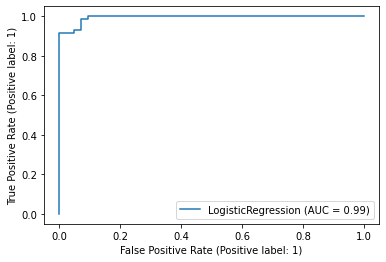

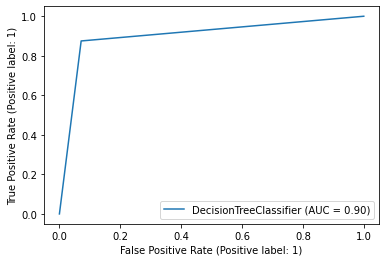

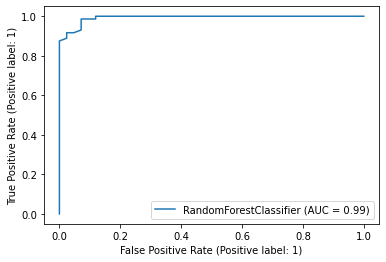

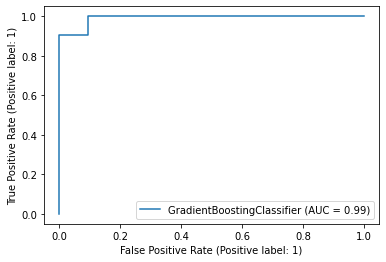

In [11]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve

plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(tree, X_test, y_test)
plot_roc_curve(forest, X_test, y_test)
plot_roc_curve(gb, X_test, y_test)
plt.show()

<br/>
<br/>
<br/>
<br/>

## Random Forest 모델 기준

- 예측 확률 분포

In [12]:
# Test 데이터의 예측 확률
pos_proba = forest.predict_proba(X_test)[:, 1]
pos_proba

array([0.  , 1.  , 0.08, 0.23, 0.01, 0.99, 0.94, 0.  , 0.  , 0.  , 0.99,
       0.04, 1.  , 0.  , 0.  , 0.9 , 0.49, 0.91, 0.96, 0.87, 0.  , 0.25,
       1.  , 0.95, 0.99, 0.33, 0.  , 1.  , 1.  , 0.98, 0.74, 0.98, 0.95,
       0.86, 0.  , 0.73, 1.  , 0.76, 0.81, 0.  , 1.  , 1.  , 0.97, 0.  ,
       0.03, 0.7 , 1.  , 1.  , 0.62, 0.  , 0.99, 0.84, 1.  , 0.7 , 1.  ,
       1.  , 0.99, 0.03, 0.  , 0.97, 1.  , 1.  , 1.  , 0.96, 0.  , 0.76,
       0.74, 0.99, 0.87, 0.9 , 0.98, 0.99, 1.  , 0.  , 0.  , 0.03, 0.19,
       1.  , 1.  , 0.99, 0.92, 1.  , 0.  , 1.  , 0.27, 0.99, 0.93, 0.99,
       0.98, 0.97, 0.89, 1.  , 0.  , 0.09, 0.01, 1.  , 0.02, 1.  , 0.01,
       0.9 , 0.05, 0.  , 0.09, 0.98, 0.  , 0.  , 0.97, 0.  , 0.87, 0.  ,
       0.51, 0.  , 0.91, 1.  ])

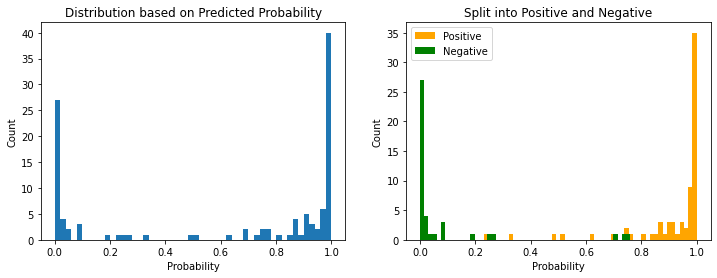

In [13]:
plt.figure(figsize = (12,4))

# 예측 확률의 분포
plt.subplot(1,2,1)
plt.hist(pos_proba, bins = 50)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Distribution based on Predicted Probability')

# 실제 정답 별 분포
plt.subplot(1,2,2)
plt.hist(pos_proba[y_test == 1], bins = 50, color = 'orange', label = 'Positive') # 실제 암 데이터의 예측 분포
plt.hist(pos_proba[y_test == 0], bins = 50, color = 'green', label = 'Negative') # 실제 정상 데이터의 예측 분포
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Split into Positive and Negative')

plt.show()

<br/>
<br/>

- threshold 별 TPR, FPR

In [14]:
fpr, tpr, threshold = roc_curve(y_test, pos_proba)

df = pd.DataFrame({
    'Threshold' : threshold,
    'TPR' : tpr,
    'FPR' : fpr
})
df

,Threshold,TPR,FPR
0,2.00,0.000000,0.000000
1,1.00,0.347222,0.000000
2,0.99,0.486111,0.000000
3,0.98,0.555556,0.000000
4,0.97,0.611111,0.000000
5,0.95,0.666667,0.000000
6,0.92,0.708333,0.000000
7,0.91,0.736111,0.000000
8,0.90,0.777778,0.000000
9,0.89,0.791667,0.000000


<br/>
<br/>

- ROC curve & AUC

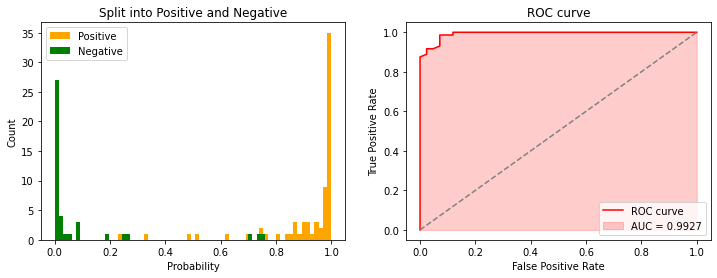

In [15]:
roc_auc = auc(fpr, tpr) # auc

plt.figure(figsize = (12,4))

# 실제 정답 별 분포
plt.subplot(1,2,1)
plt.hist(pos_proba[y_test == 1], bins = 50, color = 'orange', label = 'Positive') # 실제 암 데이터의 예측 분포
plt.hist(pos_proba[y_test == 0], bins = 50, color = 'green', label = 'Negative') # 실제 정상 데이터의 예측 분포
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Split into Positive and Negative')

# ROC Curve & AUC
plt.subplot(1,2,2)
plt.plot(fpr, tpr, c = 'r', label = 'ROC curve')
plt.plot([0,1], [0,1], c = 'gray', linestyle = '--')
plt.fill_between(fpr, 0, tpr, color = 'red', label = f'AUC = {roc_auc:.4f}', alpha = 0.2)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

<br/>
<br/>

- threshold 별 TPR & FPR

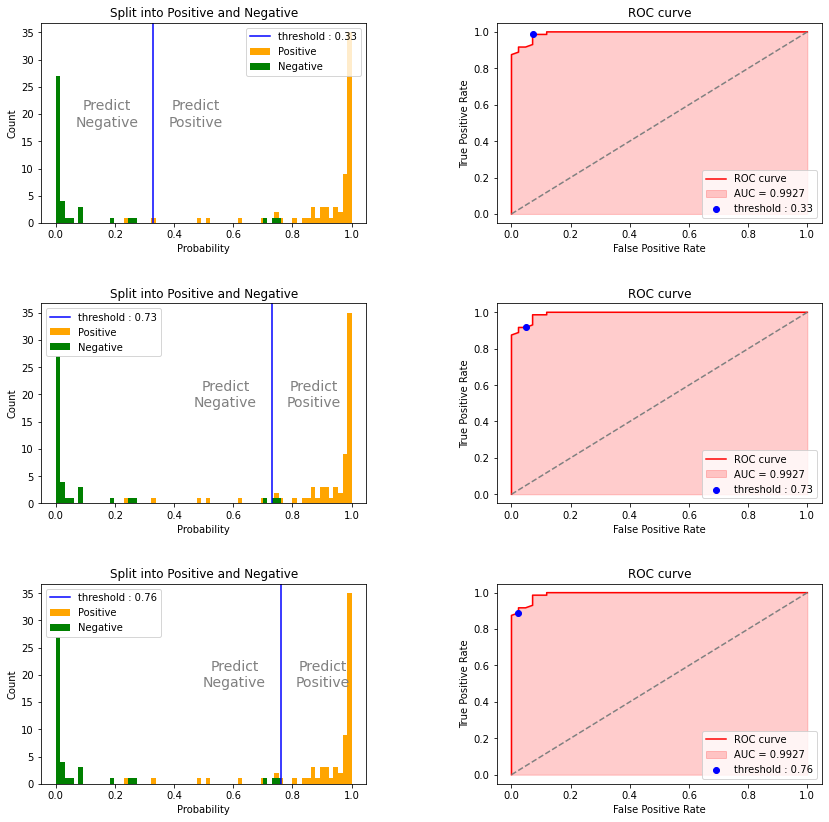

In [16]:
thresholds = df['Threshold'].values[[12, 14, 16]]

plt.figure(figsize = (14,14))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i, threshold in enumerate(thresholds[::-1]) :
    # 실제 정답 별 분포
    plt.subplot(3,2,2*i+1)
    plt.hist(pos_proba[y_test == 1], bins = 50, color = 'orange', label = 'Positive') # 실제 암 데이터의 예측 분포
    plt.hist(pos_proba[y_test == 0], bins = 50, color = 'green', label = 'Negative') # 실제 정상 데이터의 예측 분포
    plt.axvline(threshold, color = 'blue', label = f'threshold : {threshold:.2f}')
    plt.text(threshold - 0.05, 20, 'Predict\nNegative',
             fontsize = 14,
             color = 'gray',
             verticalalignment = 'center',
             horizontalalignment = 'right',
             multialignment = 'center',zorder = 4)
    plt.text(threshold + 0.05, 20, 'Predict\nPositive',
             fontsize = 14,
             color = 'gray',
             verticalalignment = 'center',
             horizontalalignment = 'left',
             multialignment = 'center',zorder = 4)
    plt.legend()
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.title('Split into Positive and Negative')

    # ROC Curve & AUC
    plt.subplot(3,2,2*i+2)
    plt.plot(fpr, tpr, c = 'r', label = 'ROC curve')
    plt.plot([0,1], [0,1], c = 'gray', linestyle = '--')
    plt.fill_between(fpr, 0, tpr, color = 'red', label = f'AUC = {roc_auc:.4f}', alpha = 0.2)
    x, y = df.loc[df['Threshold'] == threshold, ['FPR', 'TPR']].values[0]
    plt.scatter(x, y, color = 'blue', label = f'threshold : {threshold:.2f}', zorder = 3)
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

plt.show()

<br/>
<br/>
<br/>
<br/>

## Data2
> Normal Distribution

- 분포에 따른 ROC curve

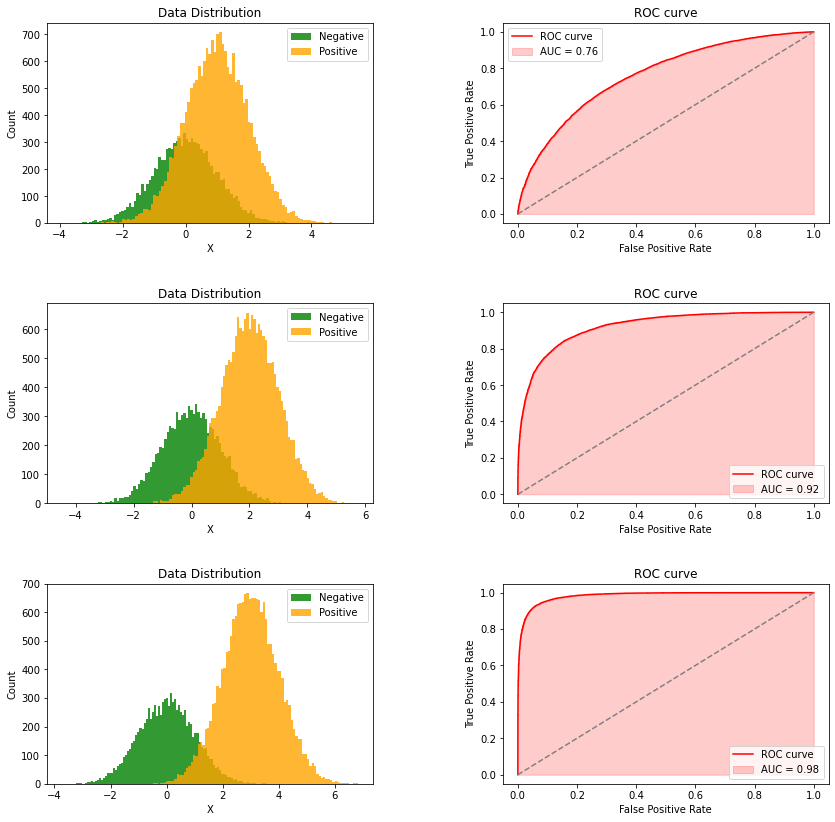

In [17]:
np.random.seed(42)

plt.figure(figsize = (14,14))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3) :
    X0 = np.random.randn(10000) # Negatibe
    X1 = np.random.randn(20000) + i + 1 # Positive

    X = np.concatenate([X0, X1])
    y = np.concatenate([[0] * 10000, [1] * 20000])
    
    plt.subplot(3,2,2*i+1)
    plt.hist(X0, bins = 100, alpha = 0.8, color = 'green', label = 'Negative')
    plt.hist(X1, bins = 100, alpha = 0.8, color = 'orange', label = 'Positive')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Count')
    plt.title('Data Distribution')
    
    plt.subplot(3,2,2*i+2)
    fpr, tpr, threshold = roc_curve(y, X)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c = 'r', label = 'ROC curve')
    plt.plot([0,1], [0,1], c = 'gray', linestyle = '--')
    plt.fill_between(fpr, 0, tpr, color = 'red', label = f'AUC = {roc_auc:.2f}', alpha = 0.2)
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

plt.show()

<br/>
<br/>

- threshold 별 TPR & FPR

In [20]:
X0 = np.random.randn(10000) # Negatibe
X1 = np.random.randn(20000) + 2 # Positive

X = np.concatenate([X0, X1])
y = np.concatenate([[0] * 10000, [1] * 20000])

fpr, tpr, threshold = roc_curve(y, X)
df = pd.DataFrame({
    'Threshold' : threshold,
    'TPR' : tpr,
    'FPR' : fpr
})
idx = [(df.shape[0] // 6) * 1, (df.shape[0] // 6) * 3, (df.shape[0] // 6) * 5]
df = df.iloc[idx[::-1], :].reset_index(drop = True)
df

,Threshold,TPR,FPR
0,0.114470,0.96980,0.4528
1,0.836178,0.87555,0.1977
2,1.572583,0.66500,0.0549


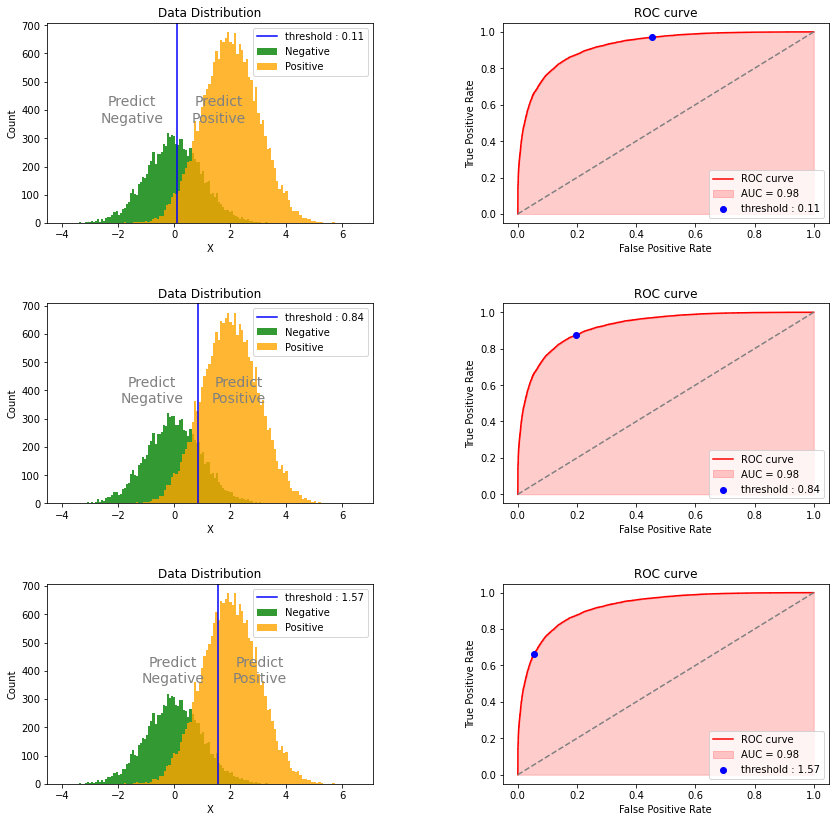

In [21]:
plt.figure(figsize = (14,14))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(3) :
    threshold, tpr_point, fpr_point = df.values[i]
    plt.subplot(3,2,2*i+1)
    plt.hist(X0, bins = 100, alpha = 0.8, color = 'green', label = 'Negative')
    plt.hist(X1, bins = 100, alpha = 0.8, color = 'orange', label = 'Positive')
    plt.axvline(threshold, color = 'blue', label = f'threshold : {threshold:.2f}')
    plt.text(threshold - 0.5, 400, 'Predict\nNegative',
             fontsize = 14,
             color = 'gray',
             verticalalignment = 'center',
             horizontalalignment = 'right',
             multialignment = 'center',zorder = 4)
    plt.text(threshold + 0.5, 400, 'Predict\nPositive',
             fontsize = 14,
             color = 'gray',
             verticalalignment = 'center',
             horizontalalignment = 'left',
             multialignment = 'center',zorder = 4)
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Count')
    plt.title('Data Distribution')

    # ROC Curve & AUC
    plt.subplot(3,2,2*i+2)
    plt.plot(fpr, tpr, c = 'r', label = 'ROC curve')
    plt.plot([0,1], [0,1], c = 'gray', linestyle = '--')
    plt.fill_between(fpr, 0, tpr, color = 'red', label = f'AUC = {roc_auc:.2f}', alpha = 0.2)
    plt.scatter(fpr_point, tpr_point, color = 'blue', label = f'threshold : {threshold:.2f}', zorder = 3)
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')

plt.show()